Theory: https://towardsdatascience.com/inshort-occlusion-analysis-for-explaining-dnns-d0ad3af9aeb6

https://towardsdatascience.com/inshort-occlusion-analysis-for-explaining-dnns-d0ad3af9aeb6

Code: https://github.com/oswaldoludwig/Sensitivity-to-occlusion-Keras-/blob/master/occlusion_sensitivity.py

https://github.com/BUPTLdy/occlusion_experiments/blob/master/Occlusion_experiments.ipynb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy
import math
import pylab
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from numpy.random import permutation
from keras.optimizers import SGD
import cv2
from keras.models import load_model

# Enter here the path to the VGG16 model weights:
# This file can be downloaded from https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3
weights_path = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Ovarian_Image_classification_ResNet60.h5'
# Enter here the path to the image:
#image_path = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Model_Training_Dataset/Test/Benign/IM235_2.jpg'
#image_path = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Annotated_Images/Annotated_Dataset/Benign/Folder_3_1_4_img064.jpeg'
#image_path = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Annotated_Images/Annotated_Dataset/Benign/Folder_3_1_5_img067.jpeg'
#image_path = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Annotated_Images/Annotated_Dataset/Benign/Folder_6_3_7_img41.jpg'
#image_path = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Annotated_Images/Annotated_Dataset/Malignant/Folder_21_3_1_img2.jpg'
image_path = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Annotated_Images/Annotated_Dataset/Malignant/Folder_21_3_1_img11.jpg'

im = cv2.imread(image_path)
print(im.shape)

# Enter here the parameters of the occluding window:
#occluding_size = 100
#occluding_pixel = 0
#occluding_stride = 5

#occluding_size = 5
#occluding_pixel = 0
#occluding_stride = 1

#occluding_size = 20
#occluding_pixel = 0
#occluding_stride = 1

#occluding_size = 10
#occluding_pixel = 0
#occluding_stride = 2

occluding_size = 5
occluding_pixel = 0
occluding_stride = 1



model = load_model('/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Ovarian_Image_classification_ResNet60.h5')

(512, 512, 3)


In [ ]:
def Occlusion_exp(image_path, occluding_size, occluding_pixel, occluding_stride):

    image = cv2.imread(image_path)
    im = cv2.resize(image, (224, 224)).astype(np.float32)

    #im = (im - 0.5)*2
    #im = np.expand_dims(im, axis=0)

    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    #im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)
    out = model.predict(im)
    out = out[0]
    # Getting the index of the winning class:
    m = max(out)
    index_object = [i for i, j in enumerate(out) if j == m]
    height, width, _ = image.shape
    output_height = int(math.ceil((height-occluding_size) / occluding_stride + 1))
    output_width = int(math.ceil((width-occluding_size) / occluding_stride + 1))
    heatmap = np.zeros((output_height, output_width))

    for h in range(output_height):
        for w in range(output_width):
            # Occluder region:
            h_start = h * occluding_stride
            w_start = w * occluding_stride
            h_end = min(height, h_start + occluding_size)
            w_end = min(width, w_start + occluding_size)
            # Getting the image copy, applying the occluding window and classifying it again:
            input_image = copy.copy(image)
            input_image[h_start:h_end, w_start:w_end,:] =  occluding_pixel
            im = cv2.resize(input_image, (224, 224)).astype(np.float32)
            #im = im.transpose((2,0,1))
            im = np.expand_dims(im, axis=0)
            out = model.predict(im)
            out = out[0]
            print('scanning position (%s, %s)'%(h,w))
            # It's possible to evaluate the VGG-16 sensitivity to a specific object.
            # To do so, you have to change the variable "index_object" by the index of
            # the class of interest. The VGG-16 output indices can be found here:
            # https://github.com/HoldenCaulfieldRye/caffe/blob/master/data/ilsvrc12/synset_words.txt
            prob = (out[index_object])
            heatmap[h,w] = prob

    f = pylab.figure()
    f.add_subplot(1, 2, 1)  # this line outputs images side-by-side
    ax = sns.heatmap(heatmap,xticklabels=False, yticklabels=False)
    f.add_subplot(1, 2, 2)
    plt.imshow(image)
    plt.show()
    print ( 'Object index is %s'%index_object)

Occlusion_exp(image_path, occluding_size, occluding_pixel, occluding_stride)

Streaming output truncated to the last 5000 lines.
scanning position (133, 254)
1/1 [==============================] - 0s 26ms/step
scanning position (133, 255)
1/1 [==============================] - 0s 24ms/step
scanning position (133, 256)
1/1 [==============================] - 0s 23ms/step
scanning position (133, 257)
1/1 [==============================] - 0s 23ms/step
scanning position (133, 258)
1/1 [==============================] - 0s 22ms/step
scanning position (133, 259)
1/1 [==============================] - 0s 22ms/step
scanning position (133, 260)
1/1 [==============================] - 0s 23ms/step
scanning position (133, 261)
1/1 [==============================] - 0s 24ms/step
scanning position (133, 262)
1/1 [==============================] - 0s 24ms/step
scanning position (133, 263)
1/1 [==============================] - 0s 25ms/step
scanning position (133, 264)
1/1 [==============================] - 0s 24ms/step
scanning position (133, 265)
1/1 [========================

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 24ms/step
scanning position (78, 75)
1/1 [==============================] - 0s 24ms/step
scanning position (78, 76)
1/1 [==============================] - 0s 25ms/step
scanning position (78, 77)
1/1 [==============================] - 0s 25ms/step
scanning position (78, 78)
1/1 [==============================] - 0s 28ms/step
scanning position (78, 79)
1/1 [==============================] - 0s 25ms/step
scanning position (78, 80)
1/1 [==============================] - 0s 24ms/step
scanning position (78, 81)
1/1 [==============================] - 0s 26ms/step
scanning position (78, 82)
1/1 [==============================] - 0s 24ms/step
scanning position (78, 83)
1/1 [==============================] - 0s 24ms/step
scanning position (78, 84)
1/1 [==============================] - 0s 24ms/step
scanning position (78, 85)
1/1 [==============================] - 0s 26ms/step
scanning position (78, 86)
1

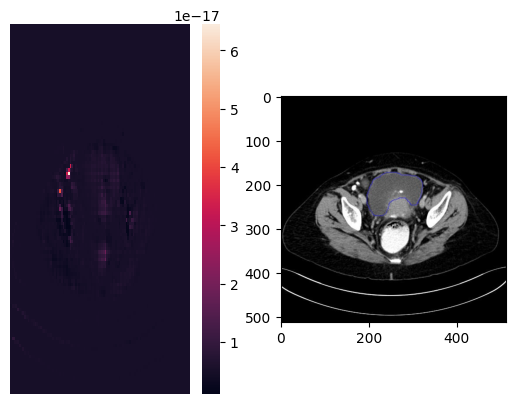

Object index is [0]


In [ ]:
def Occlusion_exp(image_path, occluding_size, occluding_pixel, occluding_stride):

    image = cv2.imread(image_path)
    im = cv2.resize(image, (224, 224)).astype(np.float32)

    #im = (im - 0.5)*2
    #im = np.expand_dims(im, axis=0)

    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    #im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)
    out = model.predict(im)
    out = out[0]
    # Getting the index of the winning class:
    m = max(out)
    index_object = [i for i, j in enumerate(out) if j == m]
    height, width, _ = image.shape
    output_height = int(math.ceil((height-occluding_size) / occluding_stride + 1))
    output_width = int(math.ceil((width-occluding_size) / occluding_stride + 1))
    heatmap = np.zeros((output_height, output_width))

    for h in range(output_height):
        for w in range(output_width):
            # Occluder region:
            h_start = h * occluding_stride
            w_start = w * occluding_stride
            h_end = min(height, h_start + occluding_size)
            w_end = min(width, w_start + occluding_size)
            # Getting the image copy, applying the occluding window and classifying it again:
            input_image = copy.copy(image)
            input_image[h_start:h_end, w_start:w_end,:] =  occluding_pixel
            im = cv2.resize(input_image, (224, 224)).astype(np.float32)
            #im = im.transpose((2,0,1))
            im = np.expand_dims(im, axis=0)
            out = model.predict(im)
            out = out[0]
            print('scanning position (%s, %s)'%(h,w))
            # It's possible to evaluate the VGG-16 sensitivity to a specific object.
            # To do so, you have to change the variable "index_object" by the index of
            # the class of interest. The VGG-16 output indices can be found here:
            # https://github.com/HoldenCaulfieldRye/caffe/blob/master/data/ilsvrc12/synset_words.txt
            prob = (out[index_object])
            heatmap[h,w] = prob

    f = pylab.figure()
    f.add_subplot(1, 2, 1)  # this line outputs images side-by-side
    ax = sns.heatmap(heatmap,xticklabels=False, yticklabels=False)
    f.add_subplot(1, 2, 2)
    plt.imshow(image)
    plt.show()
    print ( 'Object index is %s'%index_object)

Occlusion_exp(image_path, occluding_size, occluding_pixel, occluding_stride)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 30ms/step
scanning position (242, 20)
1/1 [==============================] - 0s 30ms/step
scanning position (242, 21)
1/1 [==============================] - 0s 29ms/step
scanning position (242, 22)
1/1 [==============================] - 0s 31ms/step
scanning position (242, 23)
1/1 [==============================] - 0s 29ms/step
scanning position (242, 24)
1/1 [==============================] - 0s 29ms/step
scanning position (242, 25)
1/1 [==============================] - 0s 31ms/step
scanning position (242, 26)
1/1 [==============================] - 0s 31ms/step
scanning position (242, 27)
1/1 [==============================] - 0s 30ms/step
scanning position (242, 28)
1/1 [==============================] - 0s 30ms/step
scanning position (242, 29)
1/1 [==============================] - 0s 29ms/step
scanning position (242, 30)
1/1 [==============================] - 0s 30ms/step
scanning position

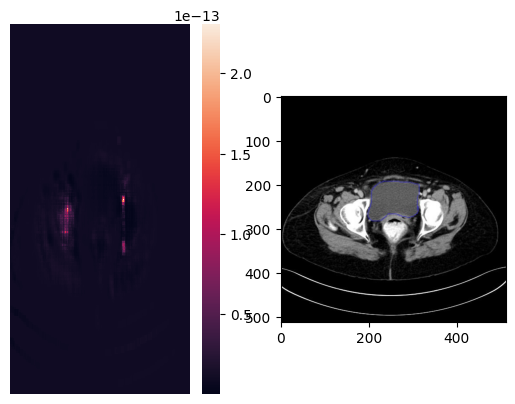

Object index is [0]


In [ ]:
def Occlusion_exp(image_path, occluding_size, occluding_pixel, occluding_stride):

    image = cv2.imread(image_path)
    im = cv2.resize(image, (224, 224)).astype(np.float32)

    #im = (im - 0.5)*2
    #im = np.expand_dims(im, axis=0)

    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    #im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)
    out = model.predict(im)
    out = out[0]
    # Getting the index of the winning class:
    m = max(out)
    index_object = [i for i, j in enumerate(out) if j == m]
    height, width, _ = image.shape
    output_height = int(math.ceil((height-occluding_size) / occluding_stride + 1))
    output_width = int(math.ceil((width-occluding_size) / occluding_stride + 1))
    heatmap = np.zeros((output_height, output_width))

    for h in range(output_height):
        for w in range(output_width):
            # Occluder region:
            h_start = h * occluding_stride
            w_start = w * occluding_stride
            h_end = min(height, h_start + occluding_size)
            w_end = min(width, w_start + occluding_size)
            # Getting the image copy, applying the occluding window and classifying it again:
            input_image = copy.copy(image)
            input_image[h_start:h_end, w_start:w_end,:] =  occluding_pixel
            im = cv2.resize(input_image, (224, 224)).astype(np.float32)
            #im = im.transpose((2,0,1))
            im = np.expand_dims(im, axis=0)
            out = model.predict(im)
            out = out[0]
            print('scanning position (%s, %s)'%(h,w))
            # It's possible to evaluate the VGG-16 sensitivity to a specific object.
            # To do so, you have to change the variable "index_object" by the index of
            # the class of interest. The VGG-16 output indices can be found here:
            # https://github.com/HoldenCaulfieldRye/caffe/blob/master/data/ilsvrc12/synset_words.txt
            prob = (out[index_object])
            heatmap[h,w] = prob

    f = pylab.figure()
    f.add_subplot(1, 2, 1)  # this line outputs images side-by-side
    ax = sns.heatmap(heatmap,xticklabels=False, yticklabels=False)
    f.add_subplot(1, 2, 2)
    plt.imshow(image)
    plt.show()
    print ( 'Object index is %s'%index_object)

Occlusion_exp(image_path, occluding_size, occluding_pixel, occluding_stride)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 25ms/step
scanning position (245, 50)
1/1 [==============================] - 0s 27ms/step
scanning position (245, 51)
1/1 [==============================] - 0s 30ms/step
scanning position (245, 52)
1/1 [==============================] - 0s 28ms/step
scanning position (245, 53)
1/1 [==============================] - 0s 27ms/step
scanning position (245, 54)
1/1 [==============================] - 0s 27ms/step
scanning position (245, 55)
1/1 [==============================] - 0s 29ms/step
scanning position (245, 56)
1/1 [==============================] - 0s 27ms/step
scanning position (245, 57)
1/1 [==============================] - 0s 30ms/step
scanning position (245, 58)
1/1 [==============================] - 0s 27ms/step
scanning position (245, 59)
1/1 [==============================] - 0s 30ms/step
scanning position (245, 60)
1/1 [==============================] - 0s 29ms/step
scanning position

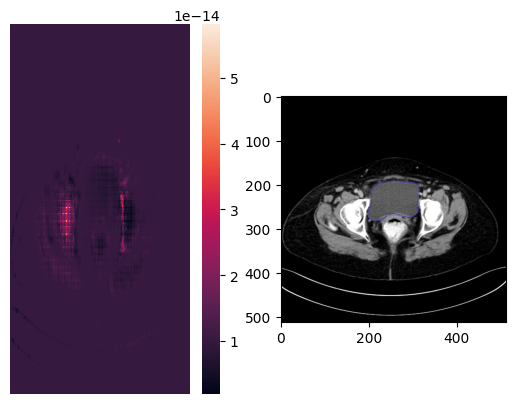

Object index is [0]


In [ ]:
def Occlusion_exp(image_path, occluding_size, occluding_pixel, occluding_stride):

    image = cv2.imread(image_path)
    im = cv2.resize(image, (224, 224)).astype(np.float32)

    #im = (im - 0.5)*2
    #im = np.expand_dims(im, axis=0)

    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    #im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)
    out = model.predict(im)
    out = out[0]
    # Getting the index of the winning class:
    m = max(out)
    index_object = [i for i, j in enumerate(out) if j == m]
    height, width, _ = image.shape
    output_height = int(math.ceil((height-occluding_size) / occluding_stride + 1))
    output_width = int(math.ceil((width-occluding_size) / occluding_stride + 1))
    heatmap = np.zeros((output_height, output_width))

    for h in range(output_height):
        for w in range(output_width):
            # Occluder region:
            h_start = h * occluding_stride
            w_start = w * occluding_stride
            h_end = min(height, h_start + occluding_size)
            w_end = min(width, w_start + occluding_size)
            # Getting the image copy, applying the occluding window and classifying it again:
            input_image = copy.copy(image)
            input_image[h_start:h_end, w_start:w_end,:] =  occluding_pixel
            im = cv2.resize(input_image, (224, 224)).astype(np.float32)
            #im = im.transpose((2,0,1))
            im = np.expand_dims(im, axis=0)
            out = model.predict(im)
            out = out[0]
            print('scanning position (%s, %s)'%(h,w))
            # It's possible to evaluate the VGG-16 sensitivity to a specific object.
            # To do so, you have to change the variable "index_object" by the index of
            # the class of interest. The VGG-16 output indices can be found here:
            # https://github.com/HoldenCaulfieldRye/caffe/blob/master/data/ilsvrc12/synset_words.txt
            prob = (out[index_object])
            heatmap[h,w] = prob

    f = pylab.figure()
    f.add_subplot(1, 2, 1)  # this line outputs images side-by-side
    ax = sns.heatmap(heatmap,xticklabels=False, yticklabels=False)
    f.add_subplot(1, 2, 2)
    plt.imshow(image)
    plt.show()
    print ( 'Object index is %s'%index_object)

Occlusion_exp(image_path, occluding_size, occluding_pixel, occluding_stride)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 28ms/step
scanning position (487, 458)
1/1 [==============================] - 0s 27ms/step
scanning position (487, 459)
1/1 [==============================] - 0s 27ms/step
scanning position (487, 460)
1/1 [==============================] - 0s 27ms/step
scanning position (487, 461)
1/1 [==============================] - 0s 25ms/step
scanning position (487, 462)
1/1 [==============================] - 0s 25ms/step
scanning position (487, 463)
1/1 [==============================] - 0s 27ms/step
scanning position (487, 464)
1/1 [==============================] - 0s 28ms/step
scanning position (487, 465)
1/1 [==============================] - 0s 26ms/step
scanning position (487, 466)
1/1 [==============================] - 0s 25ms/step
scanning position (487, 467)
1/1 [==============================] - 0s 27ms/step
scanning position (487, 468)
1/1 [==============================] - 0s 28ms/step
scanni

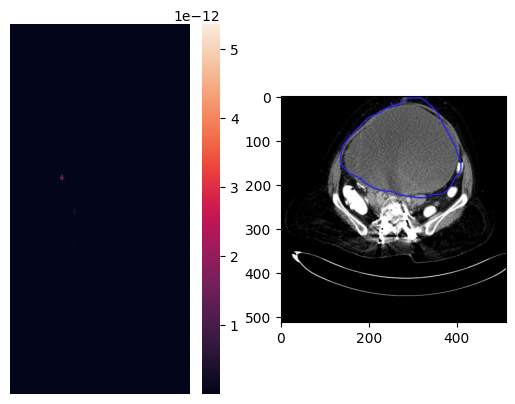

Object index is [0]


In [ ]:
def Occlusion_exp(image_path, occluding_size, occluding_pixel, occluding_stride):

    image = cv2.imread(image_path)
    im = cv2.resize(image, (224, 224)).astype(np.float32)

    #im = (im - 0.5)*2
    #im = np.expand_dims(im, axis=0)

    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    #im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)
    out = model.predict(im)
    out = out[0]
    # Getting the index of the winning class:
    m = max(out)
    index_object = [i for i, j in enumerate(out) if j == m]
    height, width, _ = image.shape
    output_height = int(math.ceil((height-occluding_size) / occluding_stride + 1))
    output_width = int(math.ceil((width-occluding_size) / occluding_stride + 1))
    heatmap = np.zeros((output_height, output_width))

    for h in range(output_height):
        for w in range(output_width):
            # Occluder region:
            h_start = h * occluding_stride
            w_start = w * occluding_stride
            h_end = min(height, h_start + occluding_size)
            w_end = min(width, w_start + occluding_size)
            # Getting the image copy, applying the occluding window and classifying it again:
            input_image = copy.copy(image)
            input_image[h_start:h_end, w_start:w_end,:] =  occluding_pixel
            im = cv2.resize(input_image, (224, 224)).astype(np.float32)
            #im = im.transpose((2,0,1))
            im = np.expand_dims(im, axis=0)
            out = model.predict(im)
            out = out[0]
            print('scanning position (%s, %s)'%(h,w))
            # It's possible to evaluate the VGG-16 sensitivity to a specific object.
            # To do so, you have to change the variable "index_object" by the index of
            # the class of interest. The VGG-16 output indices can be found here:
            # https://github.com/HoldenCaulfieldRye/caffe/blob/master/data/ilsvrc12/synset_words.txt
            prob = (out[index_object])
            heatmap[h,w] = prob

    f = pylab.figure()
    f.add_subplot(1, 2, 1)  # this line outputs images side-by-side
    ax = sns.heatmap(heatmap,xticklabels=False, yticklabels=False)
    f.add_subplot(1, 2, 2)
    plt.imshow(image)
    plt.show()
    print ( 'Object index is %s'%index_object)

Occlusion_exp(image_path, occluding_size, occluding_pixel, occluding_stride)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy
import math
import pylab
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from numpy.random import permutation
from keras.optimizers import SGD
import cv2
from keras.models import load_model

# Enter here the path to the VGG16 model weights:
# This file can be downloaded from https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3
weights_path = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Ovarian_Image_classification_ResNet60.h5'
# Enter here the path to the image:
#image_path = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Model_Training_Dataset/Test/Benign/IM235_2.jpg'
image_path = '/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Annotated_Images/Annotated_Dataset/Benign/Folder_3_1_4_img064.jpeg'

im = cv2.imread(image_path)
print(im.shape)

# Enter here the parameters of the occluding window:
#occluding_size = 100
#occluding_pixel = 0
#occluding_stride = 5

#occluding_size = 20
#occluding_pixel = 0
#occluding_stride = 5

occluding_size = 5
occluding_pixel = 0
occluding_stride = 1

model = load_model('/content/drive/MyDrive/Academic_Courses_and_ML_Projects/Paper_Publications_Files/Paper_3/Ovarian_Image_classification_ResNet60.h5')

(512, 512, 3)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 25ms/step
scanning position (503, 40)
1/1 [==============================] - 0s 24ms/step
scanning position (503, 41)
1/1 [==============================] - 0s 26ms/step
scanning position (503, 42)
1/1 [==============================] - 0s 27ms/step
scanning position (503, 43)
1/1 [==============================] - 0s 26ms/step
scanning position (503, 44)
1/1 [==============================] - 0s 26ms/step
scanning position (503, 45)
1/1 [==============================] - 0s 25ms/step
scanning position (503, 46)
1/1 [==============================] - 0s 29ms/step
scanning position (503, 47)
1/1 [==============================] - 0s 24ms/step
scanning position (503, 48)
1/1 [==============================] - 0s 26ms/step
scanning position (503, 49)
1/1 [==============================] - 0s 26ms/step
scanning position (503, 50)
1/1 [==============================] - 0s 26ms/step
scanning position

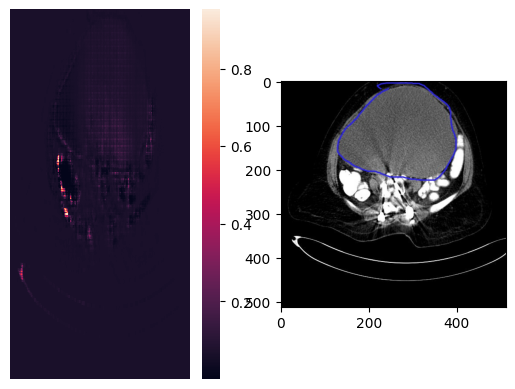

Object index is [0]


In [ ]:
def Occlusion_exp(image_path, occluding_size, occluding_pixel, occluding_stride):

    image = cv2.imread(image_path)
    im = cv2.resize(image, (224, 224)).astype(np.float32)

    #im = (im - 0.5)*2
    #im = np.expand_dims(im, axis=0)

    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    #im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)
    out = model.predict(im)
    out = out[0]
    # Getting the index of the winning class:
    m = max(out)
    index_object = [i for i, j in enumerate(out) if j == m]
    height, width, _ = image.shape
    output_height = int(math.ceil((height-occluding_size) / occluding_stride + 1))
    output_width = int(math.ceil((width-occluding_size) / occluding_stride + 1))
    heatmap = np.zeros((output_height, output_width))

    for h in range(output_height):
        for w in range(output_width):
            # Occluder region:
            h_start = h * occluding_stride
            w_start = w * occluding_stride
            h_end = min(height, h_start + occluding_size)
            w_end = min(width, w_start + occluding_size)
            # Getting the image copy, applying the occluding window and classifying it again:
            input_image = copy.copy(image)
            input_image[h_start:h_end, w_start:w_end,:] =  occluding_pixel
            im = cv2.resize(input_image, (224, 224)).astype(np.float32)
            #im = im.transpose((2,0,1))
            im = np.expand_dims(im, axis=0)
            out = model.predict(im)
            out = out[0]
            print('scanning position (%s, %s)'%(h,w))
            # It's possible to evaluate the VGG-16 sensitivity to a specific object.
            # To do so, you have to change the variable "index_object" by the index of
            # the class of interest. The VGG-16 output indices can be found here:
            # https://github.com/HoldenCaulfieldRye/caffe/blob/master/data/ilsvrc12/synset_words.txt
            prob = (out[index_object])
            heatmap[h,w] = prob

    f = pylab.figure()
    f.add_subplot(1, 2, 1)  # this line outputs images side-by-side
    ax = sns.heatmap(heatmap,xticklabels=False, yticklabels=False)
    f.add_subplot(1, 2, 2)
    plt.imshow(image)
    plt.show()
    print ( 'Object index is %s'%index_object)

Occlusion_exp(image_path, occluding_size, occluding_pixel, occluding_stride)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 25ms/step
scanning position (75, 0)
1/1 [==============================] - 0s 26ms/step
scanning position (75, 1)
1/1 [==============================] - 0s 26ms/step
scanning position (75, 2)
1/1 [==============================] - 0s 25ms/step
scanning position (75, 3)
1/1 [==============================] - 0s 25ms/step
scanning position (75, 4)
1/1 [==============================] - 0s 27ms/step
scanning position (75, 5)
1/1 [==============================] - 0s 25ms/step
scanning position (75, 6)
1/1 [==============================] - 0s 26ms/step
scanning position (75, 7)
1/1 [==============================] - 0s 25ms/step
scanning position (75, 8)
1/1 [==============================] - 0s 26ms/step
scanning position (75, 9)
1/1 [==============================] - 0s 26ms/step
scanning position (75, 10)
1/1 [==============================] - 0s 26ms/step
scanning position (75, 11)
1/1 [======

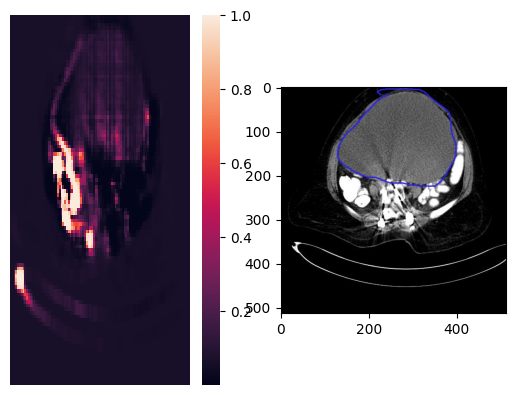

Object index is [0]


In [ ]:
def Occlusion_exp(image_path, occluding_size, occluding_pixel, occluding_stride):

    image = cv2.imread(image_path)
    im = cv2.resize(image, (224, 224)).astype(np.float32)

    #im = (im - 0.5)*2
    #im = np.expand_dims(im, axis=0)

    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    #im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)
    out = model.predict(im)
    out = out[0]
    # Getting the index of the winning class:
    m = max(out)
    index_object = [i for i, j in enumerate(out) if j == m]
    height, width, _ = image.shape
    output_height = int(math.ceil((height-occluding_size) / occluding_stride + 1))
    output_width = int(math.ceil((width-occluding_size) / occluding_stride + 1))
    heatmap = np.zeros((output_height, output_width))

    for h in range(output_height):
        for w in range(output_width):
            # Occluder region:
            h_start = h * occluding_stride
            w_start = w * occluding_stride
            h_end = min(height, h_start + occluding_size)
            w_end = min(width, w_start + occluding_size)
            # Getting the image copy, applying the occluding window and classifying it again:
            input_image = copy.copy(image)
            input_image[h_start:h_end, w_start:w_end,:] =  occluding_pixel
            im = cv2.resize(input_image, (224, 224)).astype(np.float32)
            #im = im.transpose((2,0,1))
            im = np.expand_dims(im, axis=0)
            out = model.predict(im)
            out = out[0]
            print('scanning position (%s, %s)'%(h,w))
            # It's possible to evaluate the VGG-16 sensitivity to a specific object.
            # To do so, you have to change the variable "index_object" by the index of
            # the class of interest. The VGG-16 output indices can be found here:
            # https://github.com/HoldenCaulfieldRye/caffe/blob/master/data/ilsvrc12/synset_words.txt
            prob = (out[index_object])
            heatmap[h,w] = prob

    f = pylab.figure()
    f.add_subplot(1, 2, 1)  # this line outputs images side-by-side
    ax = sns.heatmap(heatmap,xticklabels=False, yticklabels=False)
    f.add_subplot(1, 2, 2)
    plt.imshow(image)
    plt.show()
    print ( 'Object index is %s'%index_object)

Occlusion_exp(image_path, occluding_size, occluding_pixel, occluding_stride)

In [ ]:
def Occlusion_exp(image_path, occluding_size, occluding_pixel, occluding_stride):

    image = cv2.imread(image_path)
    im = cv2.resize(image, (224, 224)).astype(np.float32)

    #im = (im - 0.5)*2
    #im = np.expand_dims(im, axis=0)

    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    #im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)
    out = model.predict(im)
    out = out[0]
    # Getting the index of the winning class:
    m = max(out)
    index_object = [i for i, j in enumerate(out) if j == m]
    height, width, _ = image.shape
    output_height = int(math.ceil((height-occluding_size) / occluding_stride + 1))
    output_width = int(math.ceil((width-occluding_size) / occluding_stride + 1))
    heatmap = np.zeros((output_height, output_width))

    for h in range(output_height):
        for w in range(output_width):
            # Occluder region:
            h_start = h * occluding_stride
            w_start = w * occluding_stride
            h_end = min(height, h_start + occluding_size)
            w_end = min(width, w_start + occluding_size)
            # Getting the image copy, applying the occluding window and classifying it again:
            input_image = copy.copy(image)
            input_image[h_start:h_end, w_start:w_end,:] =  occluding_pixel
            im = cv2.resize(input_image, (224, 224)).astype(np.float32)
            #im = im.transpose((2,0,1))
            im = np.expand_dims(im, axis=0)
            out = model.predict(im)
            out = out[0]
            print('scanning position (%s, %s)'%(h,w))
            # It's possible to evaluate the VGG-16 sensitivity to a specific object.
            # To do so, you have to change the variable "index_object" by the index of
            # the class of interest. The VGG-16 output indices can be found here:
            # https://github.com/HoldenCaulfieldRye/caffe/blob/master/data/ilsvrc12/synset_words.txt
            prob = (out[index_object])
            heatmap[h,w] = prob

    f = pylab.figure()
    f.add_subplot(1, 2, 1)  # this line outputs images side-by-side
    ax = sns.heatmap(heatmap,xticklabels=False, yticklabels=False)
    f.add_subplot(1, 2, 2)
    plt.imshow(image)
    plt.show()
    print ( 'Object index is %s'%index_object)

Occlusion_exp(image_path, occluding_size, occluding_pixel, occluding_stride)

1/1 [==============================] - 0s 30ms/step
scanning position (0, 0)
1/1 [==============================] - 0s 27ms/step
scanning position (0, 1)
1/1 [==============================] - 0s 27ms/step
scanning position (0, 2)
1/1 [==============================] - 0s 26ms/step
scanning position (0, 3)
1/1 [==============================] - 0s 27ms/step
scanning position (0, 4)
1/1 [==============================] - 0s 27ms/step
scanning position (0, 5)
1/1 [==============================] - 0s 28ms/step
scanning position (0, 6)
1/1 [==============================] - 0s 29ms/step
scanning position (0, 7)
1/1 [==============================] - 0s 29ms/step
scanning position (0, 8)
1/1 [==============================] - 0s 29ms/step
scanning position (0, 9)
1/1 [==============================] - 0s 30ms/step
scanning position (0, 10)
1/1 [==============================] - 0s 29ms/step
scanning position (0, 11)
1/1 [==============================] - 0s 27ms/step
scanning position (0, 